In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp

from scipy.optimize import fsolve, leastsq
from scipy.integrate import odeint, solve_ivp
from Derivative_Equations import dvdr, dPdr, drhodr, dLdr

In [52]:
r, F, h, dhdr, rho, drhodr, v, dvdr = smp.symbols('r, F, h, dhdr, rho, drhodr, v, dvdr')
P, dPdr, L, dLdr, Br, dBrdr, BPhi, dBPhidr = smp.symbols('P, dPdr, L, dLdr, Br, dBrdr, BPhi, dBPhidr')
G, alpha, fvis, fm, dFdr = smp.symbols('G, alpha, fvis, fm, dFdr')

In [53]:
eqn1 = Br + r*dBrdr
eqn2 = dvdr*BPhi + v*dBPhidr + Br*L/r**2 - dBrdr*L/r - Br*dLdr/r
eqn3 = rho*h*v + r*drhodr*h*v + r*rho*dhdr*v + r*rho*h*dvdr
eqn4 = v*dvdr + dPdr/rho - L**2/r**3 - (Br*dBrdr - BPhi**2/r)/(4*smp.pi*rho) + F
eqn5 = (2*alpha*(P + rho*v**2) + r*alpha*(dPdr + drhodr*v**2 + 2*v*rho*dvdr)) / rho + (Br*dBrdr + Br*BPhi/r) / (4*smp.pi*rho) - v*dLdr
eqn6 = v*(dPdr - G*P*drhodr/rho)/(G - 1) - alpha*fvis*(P + rho*v**2)*L/r**2 + 3*fm*(Br**2 + BPhi**2) * v/(16*smp.pi*r) 
eqn7 = h*(1/r + (dPdr)/(P) - dFdr/F - drhodr/rho) / 2 - dhdr

In [54]:
eqns = [eqn1, eqn2, eqn3, eqn4, eqn5, eqn6, eqn7]
sol = smp.linsolve(eqns, [dvdr, dPdr, drhodr, dLdr, dBrdr, dBPhidr, dhdr])

In [55]:
sol

{((3*BPhi**2*F*G*fm*r**2*v - 4*BPhi**2*F*G*r**2*v - 3*BPhi**2*F*fm*r**2*v - 4*BPhi**2*F*r**2*v + 3*Br**2*F*G*fm*r**2*v - 4*Br**2*F*G*r**2*v - 3*Br**2*F*fm*r**2*v - 4*Br**2*F*r**2*v - 16*pi*F**2*G*r**3*rho*v - 16*pi*F**2*r**3*rho*v + 16*pi*F*G*L**2*rho*v - 16*pi*F*G*L*P*alpha*fvis*r - 16*pi*F*G*L*alpha*fvis*r*rho*v**2 + 48*pi*F*G*P*r**2*v + 16*pi*F*L**2*rho*v + 16*pi*F*L*P*alpha*fvis*r + 16*pi*F*L*alpha*fvis*r*rho*v**2 - 16*pi*G*P*dFdr*r**3*v)/(-32*pi*F*G*P*r**3 + 16*pi*F*G*r**3*rho*v**2 + 16*pi*F*r**3*rho*v**2), (8*BPhi**2*F*G*P*r**2 - 3*BPhi**2*F*G*fm*r**2*rho*v**2 + 3*BPhi**2*F*fm*r**2*rho*v**2 + 8*Br**2*F*G*P*r**2 - 3*Br**2*F*G*fm*r**2*rho*v**2 + 3*Br**2*F*fm*r**2*rho*v**2 + 32*pi*F**2*G*P*r**3*rho - 32*pi*F*G*L**2*P*rho + 16*pi*F*G*L*P*alpha*fvis*r*rho*v + 16*pi*F*G*L*alpha*fvis*r*rho**2*v**3 - 48*pi*F*G*P*r**2*rho*v**2 - 16*pi*F*L*P*alpha*fvis*r*rho*v - 16*pi*F*L*alpha*fvis*r*rho**2*v**3 + 16*pi*G*P*dFdr*r**3*rho*v**2)/(-32*pi*F*G*P*r**3 + 16*pi*F*G*r**3*rho*v**2 + 16*pi*F*r**3*rh

In [56]:
smp.simplify(sol)

{((3*BPhi**2*F*G*fm*r**2*v - 4*BPhi**2*F*G*r**2*v - 3*BPhi**2*F*fm*r**2*v - 4*BPhi**2*F*r**2*v + 3*Br**2*F*G*fm*r**2*v - 4*Br**2*F*G*r**2*v - 3*Br**2*F*fm*r**2*v - 4*Br**2*F*r**2*v - 16*pi*F**2*G*r**3*rho*v - 16*pi*F**2*r**3*rho*v + 16*pi*F*G*L**2*rho*v - 16*pi*F*G*L*P*alpha*fvis*r - 16*pi*F*G*L*alpha*fvis*r*rho*v**2 + 48*pi*F*G*P*r**2*v + 16*pi*F*L**2*rho*v + 16*pi*F*L*P*alpha*fvis*r + 16*pi*F*L*alpha*fvis*r*rho*v**2 - 16*pi*G*P*dFdr*r**3*v)/(-32*pi*F*G*P*r**3 + 16*pi*F*G*r**3*rho*v**2 + 16*pi*F*r**3*rho*v**2), (8*BPhi**2*F*G*P*r**2 - 3*BPhi**2*F*G*fm*r**2*rho*v**2 + 3*BPhi**2*F*fm*r**2*rho*v**2 + 8*Br**2*F*G*P*r**2 - 3*Br**2*F*G*fm*r**2*rho*v**2 + 3*Br**2*F*fm*r**2*rho*v**2 + 32*pi*F**2*G*P*r**3*rho - 32*pi*F*G*L**2*P*rho + 16*pi*F*G*L*P*alpha*fvis*r*rho*v + 16*pi*F*G*L*alpha*fvis*r*rho**2*v**3 - 48*pi*F*G*P*r**2*rho*v**2 - 16*pi*F*L*P*alpha*fvis*r*rho*v - 16*pi*F*L*alpha*fvis*r*rho**2*v**3 + 16*pi*G*P*dFdr*r**3*rho*v**2)/(-32*pi*F*G*P*r**3 + 16*pi*F*G*r**3*rho*v**2 + 16*pi*F*r**3*rh

In [57]:
r, f = smp.symbols("r, f")
g = smp.Function("g")(r)

In [58]:
f = r**2 + 1

In [59]:
smp.diff(f, r)

2*r

In [60]:
dgdr = smp.diff(g, r)

In [61]:
smp.linsolve(smp.diff(g, r) - 1, dgdr)

ValueError: Invalid arguments

In [ ]:
#Defining the variables
R, A = smp.symbols('r, a')
num = (R**2 - 2*A*smp.sqrt(R) + A**2)**2
den = R**3 * (smp.sqrt(R)*(R - 2) + A)**2
force_sym = num/den

#Creating the force function
Force = smp.lambdify((R, A), force_sym)
dFdr = smp.lambdify((R, A), smp.diff(force_sym, R))

In [ ]:
G = 1.4
fm = 0.5
alpha = 0
fvis = 0.5
Lc = 2.5

In [ ]:
def dvdr(S):
   r, v, P, rho, L, Br, Bphi, a = S
   Br = np.sqrt(4*np.pi*abs(P)/30)
   Bphi = Br
   num1 = dFdr(r, a)/(2*Force(r, a)) - 3/(2*r) - rho * (1 + 1/G) * (L**2/r**3 - Force(r, a) - (Br**2 + Bphi**2)/(4*np.pi*rho*r)) / (2*P)
   num2 = (G - 1) * (alpha*fvis*(P + rho*v**2)*L/r**2 + 3*fm*(Br**2 + Bphi**2)*v/(16*np.pi*r))
   den = 1/v - v*rho*(1 + 1/G) / (2*P)
   return [(num1 + num2) , den]

In [ ]:
def dPdr(S):
   r, v, P, rho, L, Br, Bphi, a = S
   Br = np.sqrt(4*np.pi*abs(P)/30)
   Bphi = Br
   num1 = G*P*(Br**2 + Bphi**2) / (2*np.pi*rho*v**2*r) + (G - 1) * (L*alpha*fvis*(P + rho*v**2) / (r**2 * v) - 3*fm*(Br**2 + Bphi**2) / (16*np.pi*r))
   num2 = 2*G*P*(Force(r, a) - L**2/r**3) / v**2 - 3*G*P/r + G*P*dFdr(r, a) / Force(r, a)
   den = (G + 1) - 2*G*P/(rho * v**2)
   return [(num1 + num2) , den]

In [ ]:
def drhodr(S):
   r, v, P, rho, L, Br, Bphi, a = S
   Br = np.sqrt(4*np.pi*abs(P)/30)
   Bphi = Br
   num1 = (G - 1) * (3*fm*(Br**2 + Bphi**2)*rho*(rho * v**2/P - 2)/(16*np.pi*r) + fvis*L*alpha* rho**2 *v*(1 - rho* v**2 / P) / r**2 + 2*L*alpha*fvis*P*rho / (G* r**2))
   num2 = 2* rho**2 * (Force(r, a) - L**2/r**3) - 3* rho**2 * v**2 / r + dFdr(r, a)* rho**2 * v**2 / Force(r, a)
   den = (G + 1) * rho * v**2 - 2*G*P
   return [(num1 + num2) , den]

In [ ]:
def dLdr(S):
   r, v, P, rho, L, Br, Bphi, a = S
   Br = np.sqrt(4*np.pi*abs(P)/30)
   Bphi = Br
   num1 = G*(Bphi**2 + Br**2)*alpha*(P - rho* v**2) / (2*np.pi*r*rho*v) - (G - 1)*3*fm*(Br**2 + Bphi**2)*alpha*v*(1 - rho* v**2 / P) / (16*np.pi*r)
   num2 = G*(Br**2 - Bphi*Br)*P/(2*np.pi* r**2 * rho*v) + (G + 1) * (Bphi*Br + Br**2)*v / (4*np.pi* r**2)
   num3 = 2*G*P*alpha * (Force(r, a) + L**2 * (rho * v**2 / P - 1) / r**3 + v**2 * (rho* v**2 / P + 1/G) / r)
   num4 = (G - 1) * L*alpha*fvis* (P**2 - rho**2 * v**4) / (P* r**2) - 4*G*P*alpha*v/r
   num5 = alpha*v * (rho* v**2 / r + G*P*dFdr(r, a) / Force(r, a) - dFdr(r, a) * rho * v**2 / Force(r, a))
   den = (G + 1) * rho * v**2 / r - 2*G*P/r
   return [(num1 + num2 + num3 + num4 + num5) , den]

In [ ]:
def Crit(S, L, a):
    r, v, rho, Pressure = S
    Br = np.sqrt(4*np.pi*abs(Pressure)/30)
    Bphi = Br
    eq1, temp = dvdr([r, v, Pressure, rho, L, Br, Bphi, a])
    eq2, den = dPdr([r, v, Pressure, rho, L, Br, Bphi, a])
    eq3, temp = drhodr([r, v, Pressure, rho, L, Br, Bphi, a])
    eq4, temp = dLdr([r, v, Pressure, rho, L, Br, Bphi, a])
    return [eq1, eq2, eq3, den]

In [ ]:
r_ini_guess = 4
v_ini_guess = 0.2
rho_ini_guess = 10**3
P_ini_guess = 10**2

ini_guess = np.array([r_ini_guess, v_ini_guess, rho_ini_guess, P_ini_guess])

In [ ]:
r_crit, v_crit, rho_crit, P_crit = fsolve(Crit, ini_guess, args=(3.2, 0), maxfev = 2000)
print(f"r_crit = {r_crit}")
print(f"v_crit = {v_crit}")
print(f"P_crit = {P_crit}")
print(f"rho_crit = {rho_crit}")

Br_crit = np.sqrt(4*np.pi*abs(P_crit)/30)
Bphi_crit = Br_crit

S = [r_crit, v_crit, P_crit, rho_crit, 3.2, Br_crit, Bphi_crit, 0]
num1, den1 = dvdr(S)
num2, den2 = dPdr(S)
num3, den3 = drhodr(S)
num4, den4 = dLdr(S)

print(f"num1 = {num1}, den1 = {den1}")
print(f"num2 = {num2}, den2 = {den2}")
print(f"num3 = {num3}, den3 = {den3}")
print(f"num4 = {num4}, den4 = {den4}")

r_crit = 3.915787961748282
v_crit = 0.3355684781508987
P_crit = 0.49181949845736206
rho_crit = 5.085595826048515
num1 = 0.01326287002730328, den1 = 0.005815640442128345
num2 = 0.018899434008270995, den2 = -0.004692867815927926
num3 = -0.005251683039891547, den3 = -0.002687462916387773
num4 = 0.0017221403790373504, den4 = -0.0006863147194486885


c:\Users\mythi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
def system(S, L, a, b):
    return Crit(S, L, a) - b

In [ ]:
b = np.zeros(6)

solution = leastsq(system, ini_guess, args=(3.2, 0, b), maxfev = 2000)
print(solution)
r_crit = solution[0][0]
v_crit = solution[0][1]
P_crit = solution[0][2]
rho_crit = solution[0][3]
print(f"r_crit = {r_crit}")
print(f"v_crit = {v_crit}")
print(f"P_crit = {P_crit}")
print(f"rho_crit = {rho_crit}")

Br_crit = np.sqrt(4*np.pi*P_crit/30)
Bphi_crit = Br_crit

S = [r_crit, v_crit, P_crit, rho_crit, 3.2, Br_crit, Bphi_crit, 0]
num1, den1 = dvdr(S)
num2, den2 = dPdr(S)
num3, den3 = drhodr(S)
num4, den4 = dLdr(S)

print(f"num1 = {num1}, den1 = {den1}")
print(f"num2 = {num2}, den2 = {den2}")
print(f"num3 = {num3}, den3 = {den3}")
print(f"num4 = {num4}, den4 = {den4}")

In [ ]:
h = 0.0001

In [ ]:
def crit_der_up(S, L, a):
    dvdr_crit, dPdr_crit, drhodr_crit, dLdr_crit = S
    r = r_crit + h
    v = v_crit + h*dvdr_crit
    Pressure = P_crit + h*dPdr_crit
    rho = rho_crit + h*drhodr_crit
    L_calc = L + h*dLdr_crit 
    Br = np.sqrt(4*np.pi*abs(Pressure)/30)
    Bphi = Br
    eq1 = dvdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dvdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dvdr_crit
    eq2 = dPdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dPdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dPdr_crit
    eq3 = drhodr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/drhodr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - drhodr_crit
    eq4 = dLdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dLdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dLdr_crit
    return [eq1, eq2, eq3, eq4]

In [ ]:
def crit_der_down(S, L, a):
    dvdr_crit, dPdr_crit, drhodr_crit, dLdr_crit = S
    r = r_crit - h
    v = v_crit - h*dvdr_crit
    Pressure = P_crit - h*dPdr_crit
    rho = rho_crit - h*drhodr_crit
    L_calc = L + h*dLdr_crit     
    Br = np.sqrt(4*np.pi*abs(Pressure)/30)
    Bphi = Br
    eq1 = dvdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dvdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dvdr_crit
    eq2 = dPdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dPdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dPdr_crit
    eq3 = drhodr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/drhodr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - drhodr_crit
    eq4 = dLdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[0]/dLdr([r, v, Pressure, rho, L_calc, Br, Bphi, a])[1] - dLdr_crit
    return [eq1, eq2, eq3, eq4]

In [ ]:
dvdr_ini_guess = -0.4
dPdr_ini_guess = -10
drhodr_ini_guess = -25
dLdr_ini_guess = 0.01

crit_der_ini_guess = [dvdr_ini_guess, dPdr_ini_guess, drhodr_ini_guess, dLdr_ini_guess]

In [ ]:
v_crit_up, P_crit_up, rho_crit_up, L_crit_up = fsolve(crit_der_up, crit_der_ini_guess, args = (3.2, 0), maxfev = 2000)
crit_der_up([v_crit_up, P_crit_up, rho_crit_up, L_crit_up], 3.2, 0)

In [ ]:
v_crit_down, P_crit_down, rho_crit_down, L_crit_down = fsolve(crit_der_down, crit_der_ini_guess, args = (3.2, 0))
crit_der_down([v_crit_down, P_crit_down, rho_crit_down, L_crit_down], 3.2, 0)

In [ ]:
v_critical = (v_crit_up + v_crit_down) / 2
v_critical

In [ ]:
dvdr_crit = v_crit_down
dPdr_crit = P_crit_down
drhodr_crit = rho_crit_down
dLdr_crit = L_crit_down

In [ ]:
from Solving_ODE import Solve_ODE, derivatives, Crit_derivatives

In [ ]:
derivativ(r_crit, [0.2, 20, 600, 3.0], 3.2, 0, [r_crit, v_crit, dvdr_crit, dPdr_crit, drhodr_crit, dLdr_crit])

In [ ]:
Solve_ODE(3.2, 0.0, -1)

In [ ]:
Br = np.sqrt(4*np.pi*P_crit/30) + 0.01
Bphi = Br 
dvdr([r_crit + 0.01, v_crit + 0.01, P_crit + 0.01, rho_crit + 0.01, 3.21, Br, Bphi, 0])

[-0.02179793472278934, -0.11391931606790129]

In [ ]:
def Solve_Ode_above(Lc, a, sgn):
    S_up, S_down = Crit_derivatives(Lc, a, sgn)
    r_crit, v_crit, P_crit, rho_crit, dvdr_critical_up, dPdr_critical_up, drhodr_critical_up, dLdr_critical_up = S_up
    Crits_up = np.array([r_crit, v_crit, dvdr_critical_up, dPdr_critical_up, drhodr_critical_up, dLdr_critical_up])
    
    r_crit, v_crit, P_crit, rho_crit, dvdr_critical_down, dPdr_critical_down, drhodr_critical_down, dLdr_critical_down = S_down
    Crits_down = np.array([r_crit, v_crit, dvdr_critical_down, dPdr_critical_down, drhodr_critical_down, dLdr_critical_down])
    
    #Crits = (Crits_down - Crits_up) / 2
    Crits = Crits_down
    
    #Solving the ODE above rc
    r_solve = np.arange(r_crit, 15, 0.01)
    solution = odeint(derivatives, y0 = np.array([v_crit, P_crit, rho_crit, 3.2]), t = r_solve, tfirst = True, args = (Lc, a, Crits))
    
    v_r = np.array([])
    P_sol = np.array([])
    rho = np.array([])
    L_sol = np.array([])
    for i in range(len(r_solve)):
        v_r = np.concatenate((v_r, np.array([solution[i][0]])))
        P_sol = np.concatenate((P_sol, np.array([solution[i][1]])))
        rho = np.concatenate((rho, np.array([solution[i][2]])))
        L_sol = np.concatenate((L_sol, np.array([solution[i][3]])))
        
    #For Accretion
    if dvdr_critical_down < 0:
        str = "Accretion"
        x = v_r
        
    else:
        str = "Wind"
        x = np.sqrt(G * P_sol / rho)
    
    c_s = np.sqrt(G * P_sol / rho)
    
    #Plotting the final solution
    plt.plot(r_solve, c_s, label = "Speed of sound")
    plt.plot(r_solve, v_r, label = "Speed of gas")
    plt.grid()
    plt.xlabel("The distance from center of black hole (in r0 units)")
    plt.ylabel("Speed of sound/gas (assuming speed of light, c = 1)")
    plt.title("Plot of v_r and c_s vs r for " + str)
    plt.legend()
    plt.show()

    #Plotting the ratio of v_r and c_s
    plt.plot(r_solve, v_r/c_s)
    plt.grid()
    plt.xlabel("The distance from center of black hole (in r0 units)")
    plt.ylabel("Ratio of speed of gas to speed of sound")
    plt.title("Plot of v_r/c_s as a function of r in case of " + str)
    plt.show()

    #Plotting the Pressure
    plt.plot(r_solve, P_sol)
    plt.grid()
    plt.xlabel("The distance from center of black hole (in r0 units)")
    plt.ylabel("Pressure of the gas")
    plt.title("Plot of Pressure as a function of r in case of " + str)
    plt.show()

    #Plotting the density
    plt.plot(r_solve, rho)
    plt.grid()
    plt.xlabel("The distance from center of black hole (in r0 units)")
    plt.ylabel("Density of the gas")
    plt.title("Plot of Density as a function of r in case of " + str)
    plt.show()

    #Plotting the angular momentum
    plt.plot(r_solve, L_sol)
    plt.grid()
    plt.xlabel("The distance from center of black hole (in r0 units)")
    plt.ylabel("Angular momentum of the gas")
    plt.title("Plot of Angular momentum as a function of r in case of " + str)
    plt.show()

    final_solution = [v_r, P_sol, rho, L_sol]
    print(f"The critical radius is: {r_crit}")   
    print(f"The critical velocity derivative above is: {dvdr_critical_up}") 
    print(f"The critical velocity derivative below is: {dvdr_critical_down}") 
    print(solution[5][0])
    
    return final_solution, r_solve


c:\Users\mythi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\mythi\AppData\Local\Temp\ipykernel_21892\2110498789.py:35: RuntimeWarning: divide by zero encountered in true_divide
  c_s = np.sqrt(G * P_sol / rho)
C:\Users\mythi\AppData\Local\Temp\ipykernel_21892\2110498789.py:35: RuntimeWarning: invalid value encountered in true_divide
  c_s = np.sqrt(G * P_sol / rho)


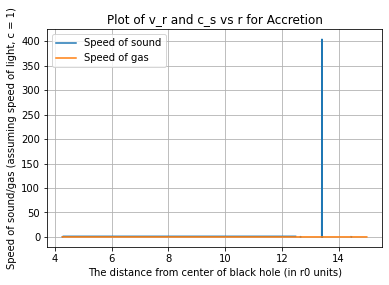

C:\Users\mythi\AppData\Local\Temp\ipykernel_21892\2110498789.py:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(r_solve, v_r/c_s)


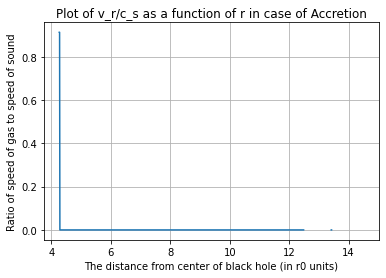

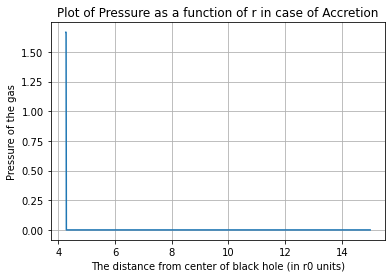

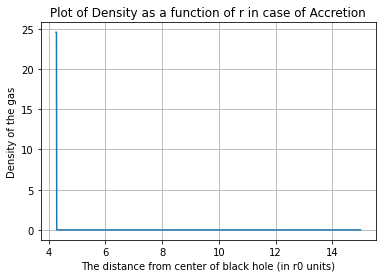

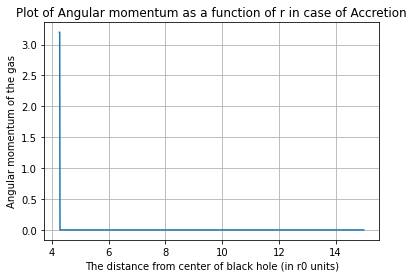

The critical radius is: 4.266881033106736
The critical velocity derivative above is: 0.39522668087446905
The critical velocity derivative below is: -0.36301076746145466
1.1117927906264e-311


([array([2.81315816e-001, 2.81263319e-001, 1.11179283e-311, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]),
  array([1.66528254e+000, 1.66559468e+000, 1.11179255e-311, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]),
  array([2.45634947e+001, 2.45634816e+001, 1.11179295e-311, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]),
  array([3.20000000e+000, 3.20004536e+000, 1.11179266e-311, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000])],
 array([ 4.26688103,  4.27688103,  4.28688103, ..., 14.97688103,
        14.98688103, 14.99688103]))

In [ ]:
Solve_Ode_above(3.2, 0, -1)

In [ ]:
v = 2.81263319e-001
P = 1.66559468e+000
rho = 2.45634816e+001
L = 3.20004536e+000
Lc = 3.2
r = r_crit - 0.005
h = 0.005

In [ ]:
Br = np.sqrt(4*np.pi*abs(P)/30) * r_crit/r
Bphi = (np.sqrt(4*np.pi*abs(P)/30)*v_crit - np.sqrt(4*np.pi*abs(P)/30)*Lc/r_crit + Br*L/r) / v

In [ ]:
dvdr([r, v, P, rho, L, Br, Bphi, 0])

[0.3911286895393639, -2.578552038556836e-08]

In [ ]:
from Derivative_Equations import *

In [ ]:
drhodr([r_crit + h, v, P, rho, L, Br, Bphi, 0])

[35.746067177975604, 3.3823329914639544e-08]